In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
def randomizeTimes( x, p=[None] ):
    inputtime = x[0]
    time = inputtime
    
    w0 = 2.6094;
    A = 2.80;
    tauA = 56.6;
    B = 6.18;
    tauB = 6.32;
    
    wCBO =  (w0 - (A/(tauA)) * r.TMath.Exp(-time/(1000.0*tauA)) - (B/(tauB)) * r.TMath.Exp(-time/(tauB*1000.0)) ); #MHz
    wa =  r.TMath.TwoPi() * 0.2291; #MHZ
    wc =  r.TMath.TwoPi() / 0.14919; #MHz

    factor = 1.0;
    wY = factor * (wCBO) * r.TMath.Sqrt( (2 * wc / (factor * wCBO)) -1.0 ) ;
    wVW = wc - (2.0 * wY);

    TCBO = r.TMath.TwoPi() / wCBO;
    Ta = r.TMath.TwoPi() / wa;
    TVW = r.TMath.TwoPi() / wVW;
    TY = r.TMath.TwoPi() / wY;
    T_diff= r.TMath.TwoPi()/(wCBO-wa);
    
    #time += (rng->Uniform()-0.5)*(Ta*1000.0);// w_a 4365
    timestorandomize = [
                        Ta, 
                        TCBO, 
                        TVW, 
                        TY, 
                        T_diff,
                       ]
    
    for periodi in timestorandomize:
        #time += (np.random.random() - 0.5)*(periodi)
        time += -1*np.abs((np.random.random() - 0.5))*(periodi)
    #print(inputtime, time, TCBO, Ta)
    
    #print(time, time/1000.)
    return time

In [21]:
np.random.seed(8675309)

h1 = r.TH1D("h1","Non-Random",1000,0,100)
h2 = r.TH1D("h2","Random",1000,0,100)

times = []
randTimes = []

for x in range(100000):
    timei = np.random.exponential(scale=7.0, size=None)
    times.append(timei)
    h1.Fill(timei)
    time_rand = randomizeTimes([timei])
    randTimes.append(time_rand)
    h2.Fill(time_rand)

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


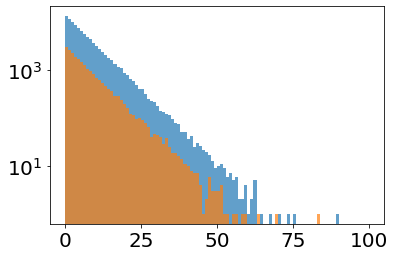

In [22]:
plt.hist(times,bins=100,range=(0,100),alpha=0.7)
plt.hist(randTimes,bins=100,range=(0,100),alpha=0.7)
plt.yscale("log")
plt.show()

 FCN=529.605 FROM MINOS     STATUS=SUCCESSFUL     12 CALLS         161 TOTAL
                     EDM=1.39508e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.43624e+03   6.43591e+00   1.45281e-03  -1.77467e-06
   2  #tau         6.93121e+00   2.20619e-02   2.20619e-02  -1.54416e-03
 FCN=383.175 FROM MINOS     STATUS=SUCCESSFUL     12 CALLS         135 TOTAL
                     EDM=6.4557e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            3.19279e+02   3.10559e+00   1.31918e-03  -1.58891e-05
   2  #tau         6.88968e+00   4.90859e-02   4.90859e-02  -4.01846e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


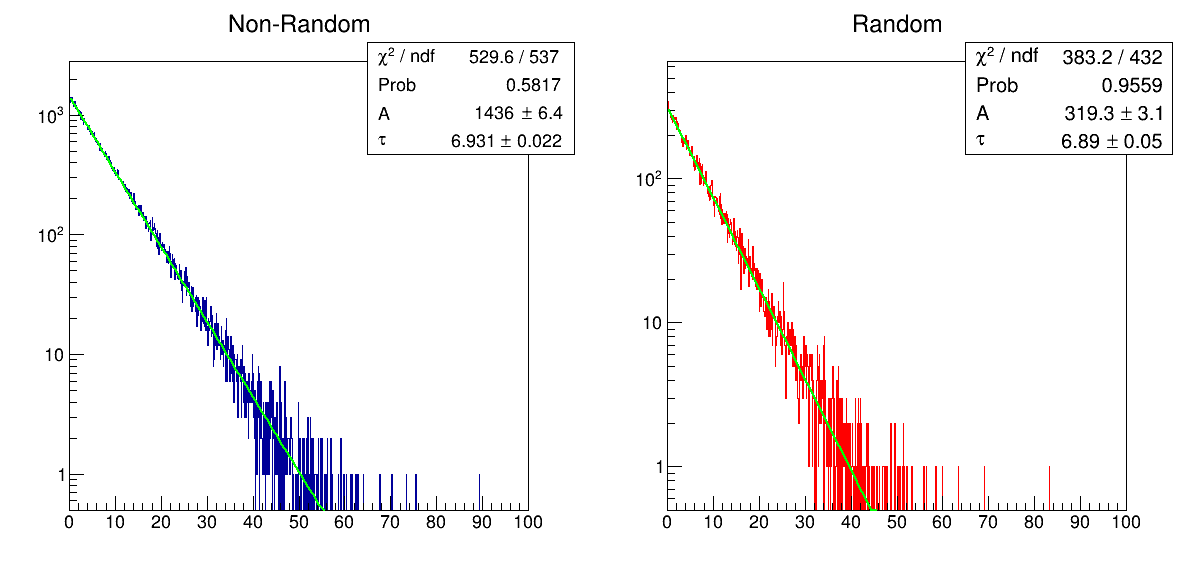

In [25]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)

f2 = r.TF1("f2","[0]*TMath::Exp(-x/[1])",0,100)
f2.SetParameters(100,7)
f2.SetParNames("A","#tau")
f2.SetLineColor(3)

h1.Draw("hist")
h1.Fit(f2,"REMB")
f2.DrawCopy("same")
r.gPad.SetLogy()
c.cd(2)
h2.Draw("hist")
h2.Fit(f2,"REMB")
f2.DrawCopy("same")
r.gPad.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


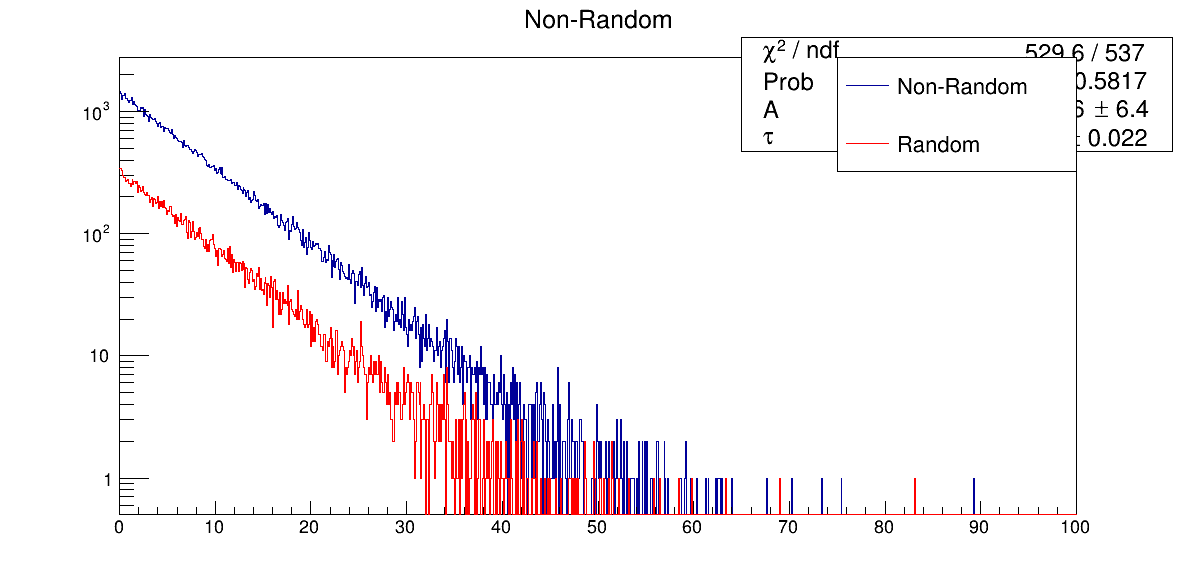

In [26]:
c = r.TCanvas("c","c",1200,600)

h1.Draw("hist")

h2.SetLineColor(2)
h2.Draw("hist same")

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(h1,"Non-Random", "l")
leg.AddEntry(h2,"Random", "l")
leg.Draw()

c.SetLogy()
c.Draw()

In [ ]:
%%time

hists = []

for i in range(100):
    np.random.seed(8675309+i)

    h1i = r.TH1D("h1i","Non-Random",1000,0,100)
    h2i = r.TH1D("h2i","Random",1000,0,100)

    times = []
    randTimes = []

    for x in range(100000):
        timei = np.random.exponential(scale=7.0, size=None)
        times.append(timei)
        h1i.Fill(timei)
        time_rand = randomizeTimes([timei])
        h2i.Fill(time_rand)
        
    hists.append((h1i.Clone("h1_"+str(i)), h2i.Clone("h2_"+str(i))))

In [ ]:
print(hists)

In [ ]:
taus = []
tauRands = []

for h1i, h2i in hists:
    c = r.TCanvas("c","c",1200,600)
    c.Divide(2)
    c.cd(1)

    f2 = r.TF1("f2","[0]*TMath::Exp(-x/[1])",0,100)
    f2.SetParameters(100,7)
    f2.SetParNames("A","#tau")
    

    h1i.Draw("hist")
    h1i.Fit(f2,"REMBQ")
    f2.DrawCopy("same")
    taus.append(f2.GetParameter(1))
    r.gPad.SetLogy()
    
    c.cd(2)
    h2i.Draw("hist")
    h2i.Fit(f2,"REMBQ")
    f2.DrawCopy("same")
    r.gPad.SetLogy()
    
    
    tauRands.append(f2.GetParameter(1))
    
    c.Draw()

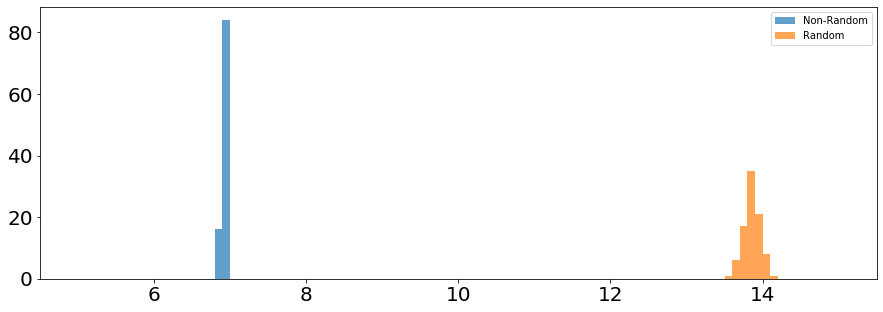

In [54]:
fig,ax = plt.subplots(figsize=(15,5))
rangei=(5,15)
plt.hist(taus,bins=100, range=rangei, label="Non-Random",alpha=0.7)
plt.hist(tauRands,bins=100,range=rangei,label="Random",alpha=0.7)
plt.legend()
plt.show()

---

### Jason made a good point: the statistics fall off with 64.4, but the effect changes at 7 us. Maybe we can incorporate that into our model using TH1::GetRandom

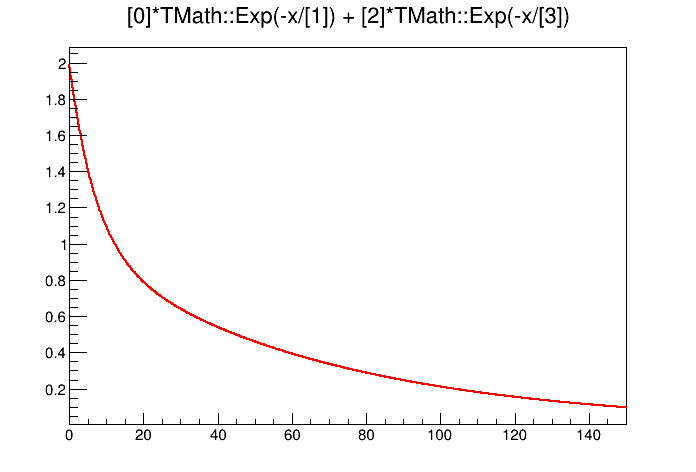

In [68]:
f = r.TF1("f","[0]*TMath::Exp(-x/[1]) + [2]*TMath::Exp(-x/[3])",0,150)
f.SetParameters(1,7,1,64.4)
f.SetNpx(1000)

c = r.TCanvas()
f.Draw()
c.Draw()

In [ ]:
%%time

h1 = r.TH1D("h1","Non-Random",1000,0,100)
h2 = r.TH1D("h2","Random",1000,0,100)

times = []
randTimes = []

for x in range(1000000):
    #timei = np.random.exponential(scale=7.0, size=None)
    timei = f.GetRandom()
    #print(timei)
    times.append(timei)
    h1.Fill(timei)
    time_rand = randomizeTimes([timei])
    h2.Fill(time_rand)
    randTimes.append(time_rand)

In [ ]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)

f2 = r.TF1("f2","[0]*TMath::Exp(-x/[1])",25,100)
f2.SetParameters(100,7)
f2.SetParNames("A","#tau")
f2.SetLineColor(3)

h1.Draw("hist")
h1.Fit(f2,"REMB")
f2.DrawCopy("same")
r.gPad.SetLogy()
c.cd(2)
h2.Draw("hist")
h2.Fit(f2,"REMB")
f2.DrawCopy("same")
r.gPad.SetLogy()
c.Draw()

---

### Lets try to build a 2-D distribution, where the y-value changes with 7 us and the x-value changes with 64.4 us

In [3]:
ytau = 7
xtau = 64.4

In [4]:
f2 = r.TF2("f2","[0]*((3-x)**2)*TMath::Exp(-y/[1]) + [2]*TMath::Exp(-x/[3])",0,100,0,6)

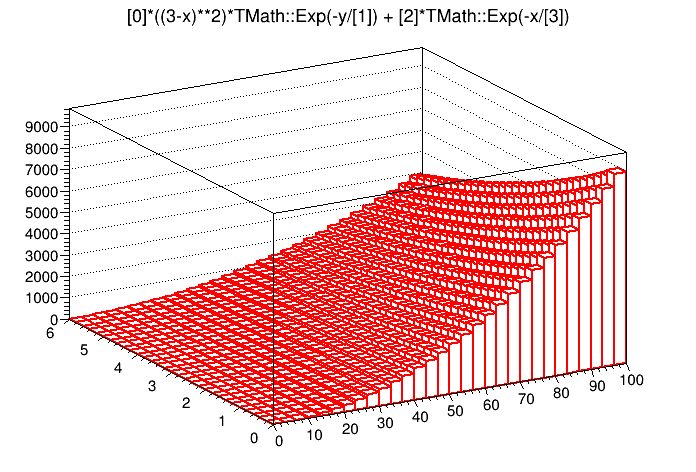

In [5]:
c = r.TCanvas()
f2.SetParameters(1,ytau,1,xtau)
f2.Draw("lego")
c.Draw()

In [6]:
def f_nonRand(x,p):
    #([0]*(3-y - TMath::Exp(-x/[1]))**2+[2] )*TMath::Exp(-x/[3])
    t = x[0]
    y = x[1]
    
    return (p[0]*((3-y) - r.TMath.Exp(-t/p[1]))**2 + p[2])*r.TMath.Exp(-t/p[3])

def f_rand(x,p):
    randtime = randomizeTimes([x[0]])
    #print(x[0], randtime)
    newx = [randtime, x[1]]
    return f_nonRand(newx,p)

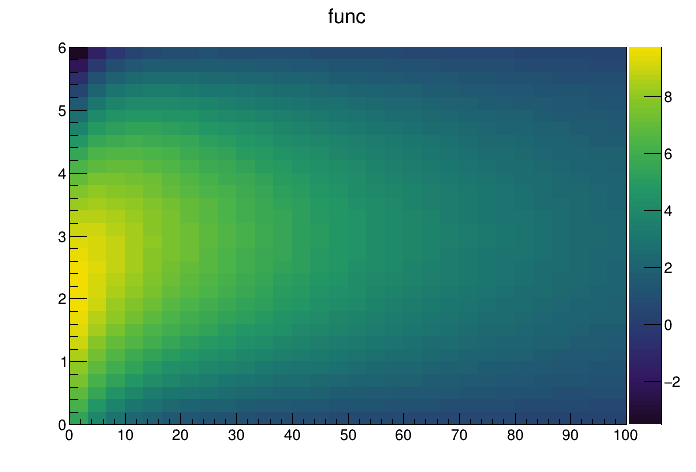

In [7]:
c = r.TCanvas()
f = r.TF2("func",f_nonRand,0,100,0,6,4)
f.SetParameters(-1,ytau,10,xtau)
f.Draw("colz")
#c.SetLogz()
c.Draw()

CPU times: user 2.02 s, sys: 562 ms, total: 2.58 s
Wall time: 2.62 s


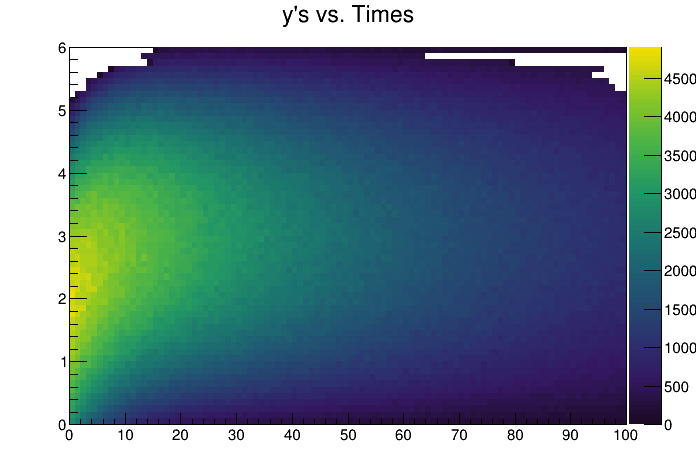

In [8]:
%%time

h = r.TH2D("h","y's vs. Times", 100,0,100,60,0,6)
h.FillRandom("func",10000000)

c = r.TCanvas()
h.Draw("colz")
c.Draw()

In [ ]:
%%time

f2 = r.TF2("func2",f_rand,0,100,0,6,4)
f2.SetParameters(-1,ytau,10,xtau)

h = r.TH2D("h","Random y's vs. Times", 100,0,100,60,0,6)
h.FillRandom("func2",100000)

c = r.TCanvas()
h.Draw("colz")
c.Draw()

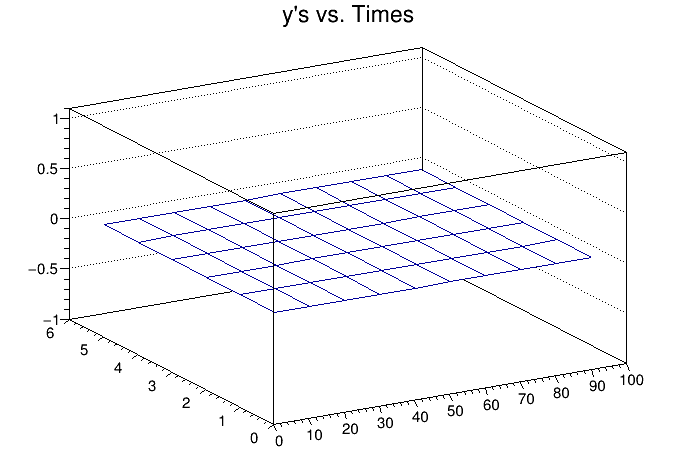

In [88]:
c = r.TCanvas()
h2.Draw("surf")
c.Draw()

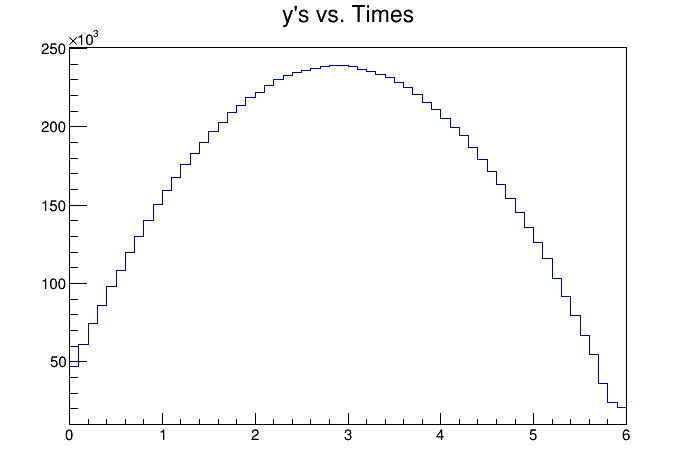

In [68]:
h.ProjectionY().Draw()
c.Draw()

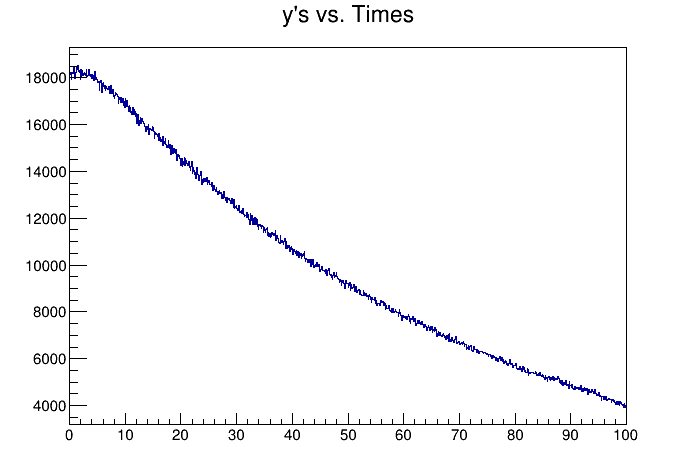

In [69]:
h.ProjectionX().Draw()
c.Draw()